In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
my_data = pd.read_csv('./data/inssurance.csv', sep=',')
print(my_data)
print(my_data.describe())
print(my_data.info())

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.4

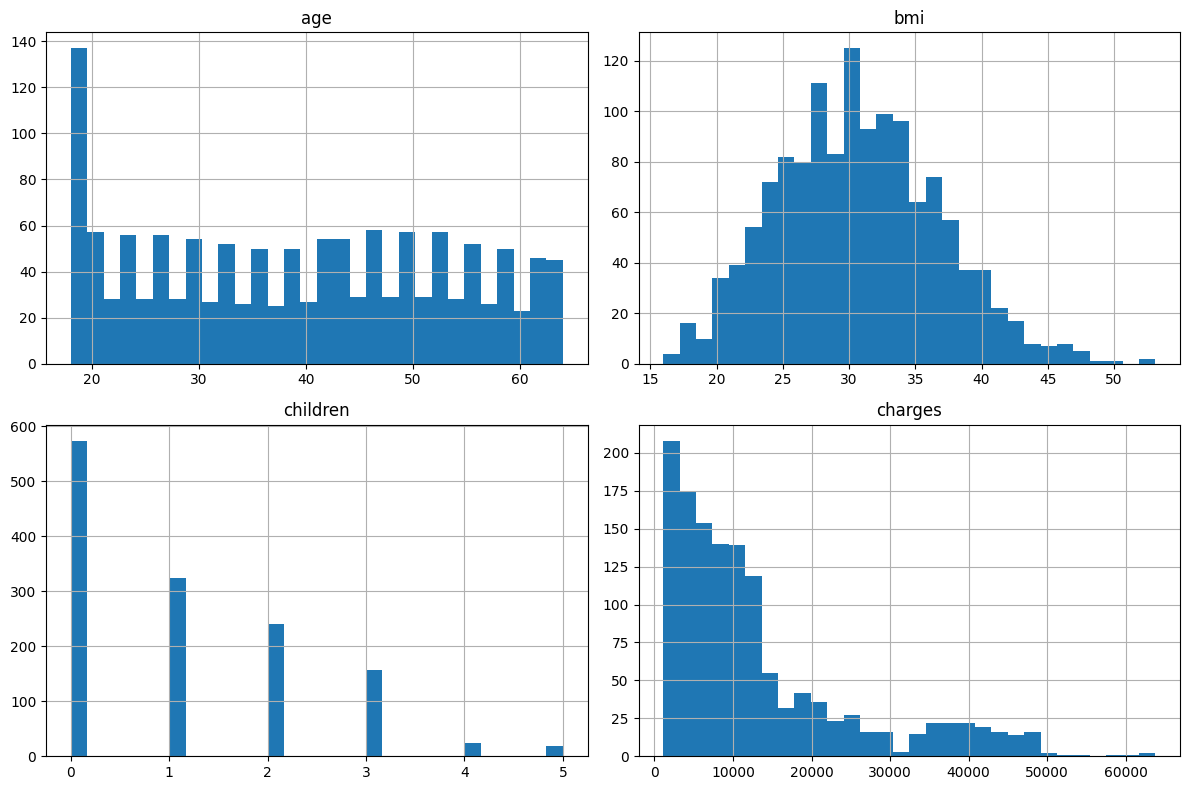

In [6]:
# Histogram of numerical variables
num_cols = ['age', 'bmi', 'children', 'charges']
my_data[num_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

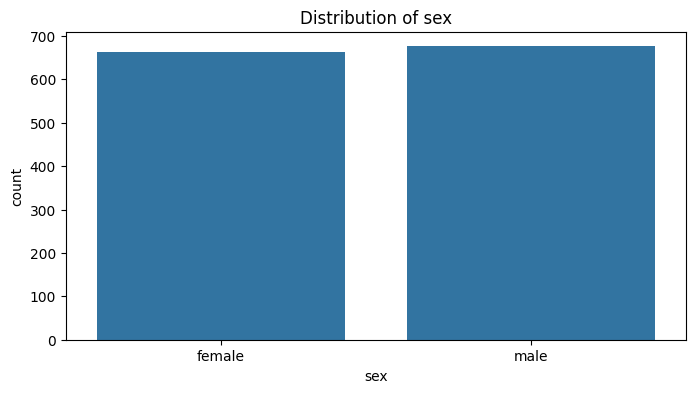

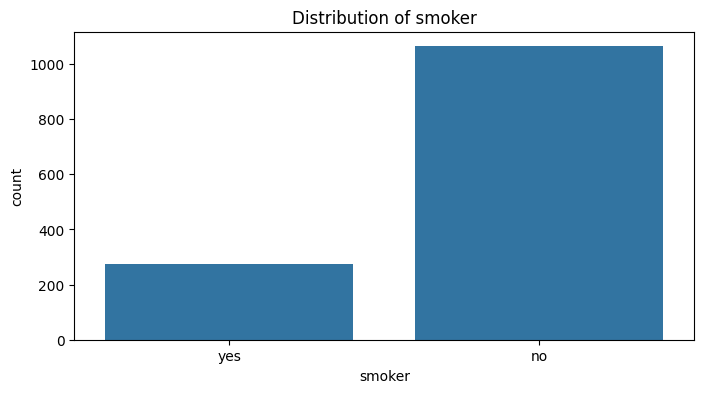

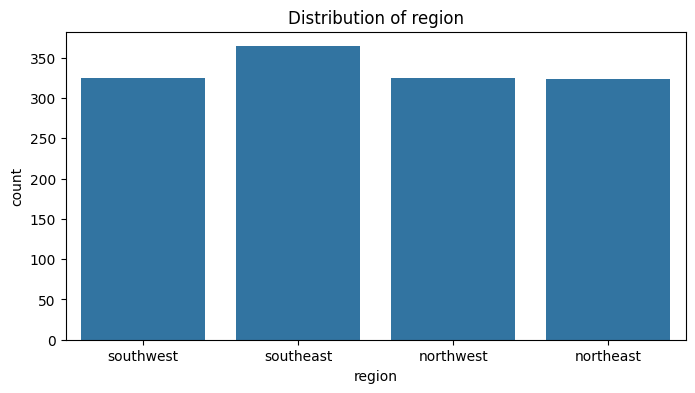

In [8]:
# histogram of categorical variables
cat_cols = ['sex', 'smoker', 'region']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=my_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

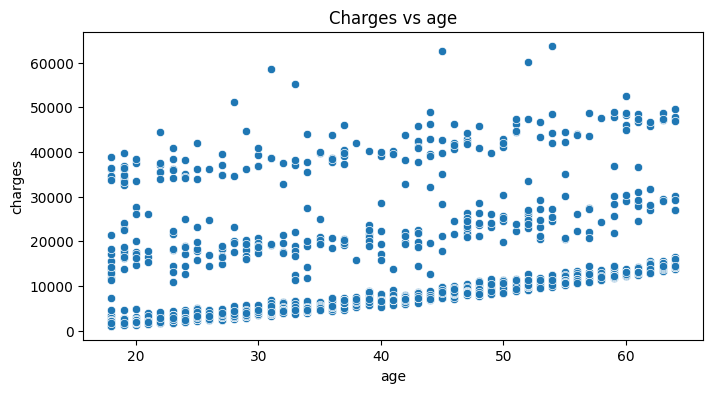

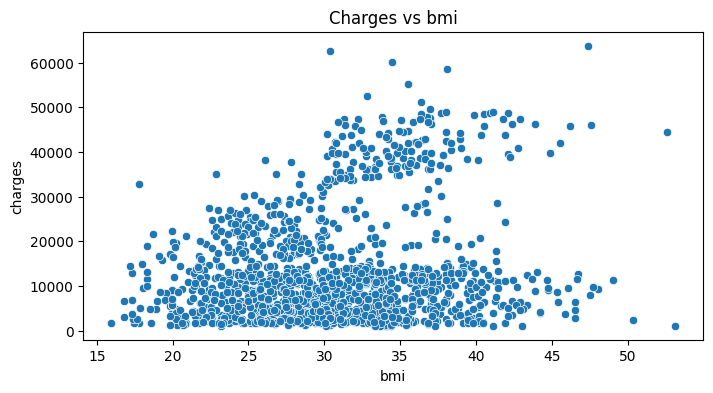

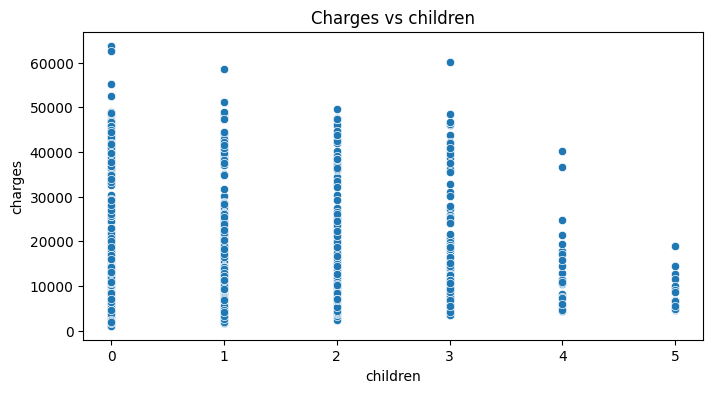

In [9]:
# Relation between "charges" and numerical variables
for col in num_cols[:-1]:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=my_data, x=col, y='charges')
    plt.title(f'Charges vs {col}')
    plt.show()

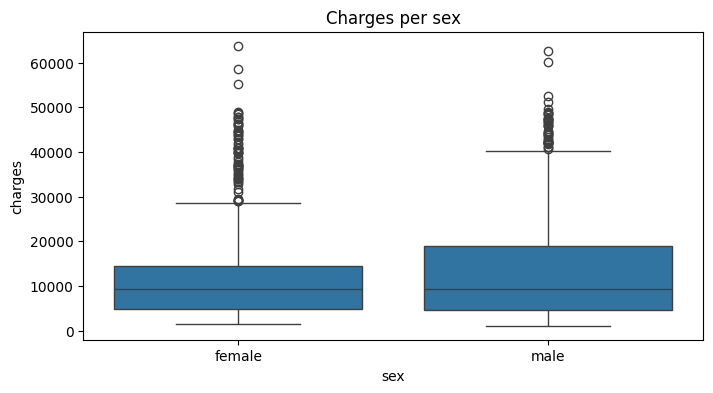

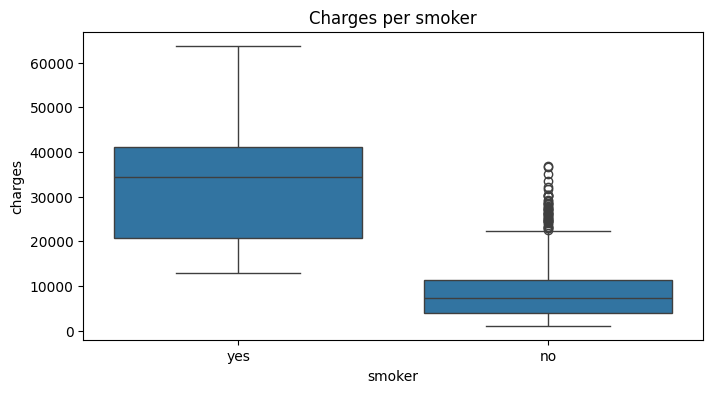

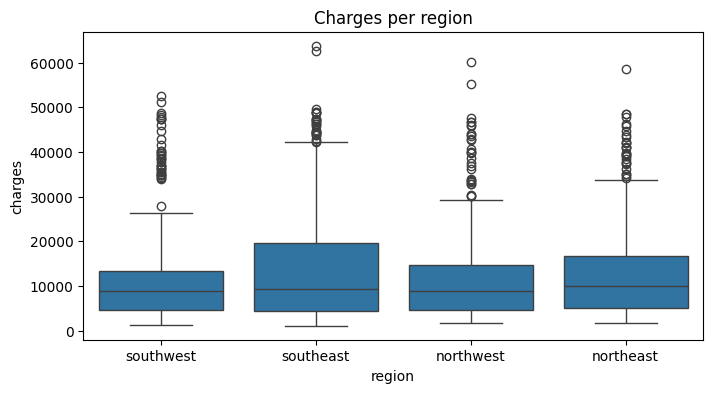

In [11]:
# Relation between "charges" and categorical variables
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=my_data, x=col, y='charges')
    plt.title(f'Charges per {col}')
    plt.show()

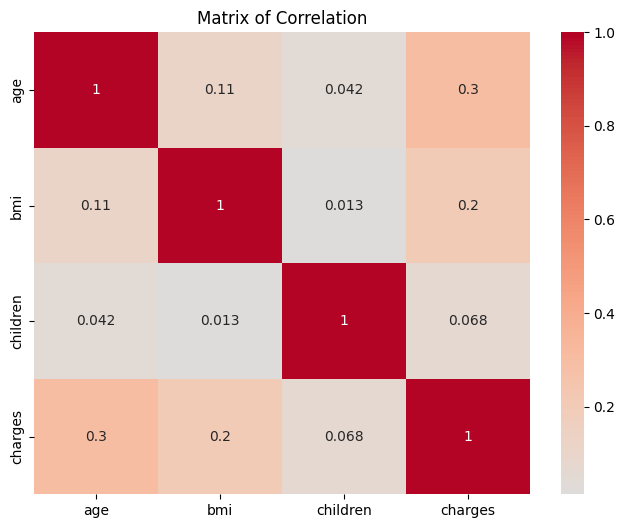

In [12]:
# Correlation matrix
corr = my_data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matrix of Correlation')
plt.show()

<Figure size 1000x800 with 0 Axes>

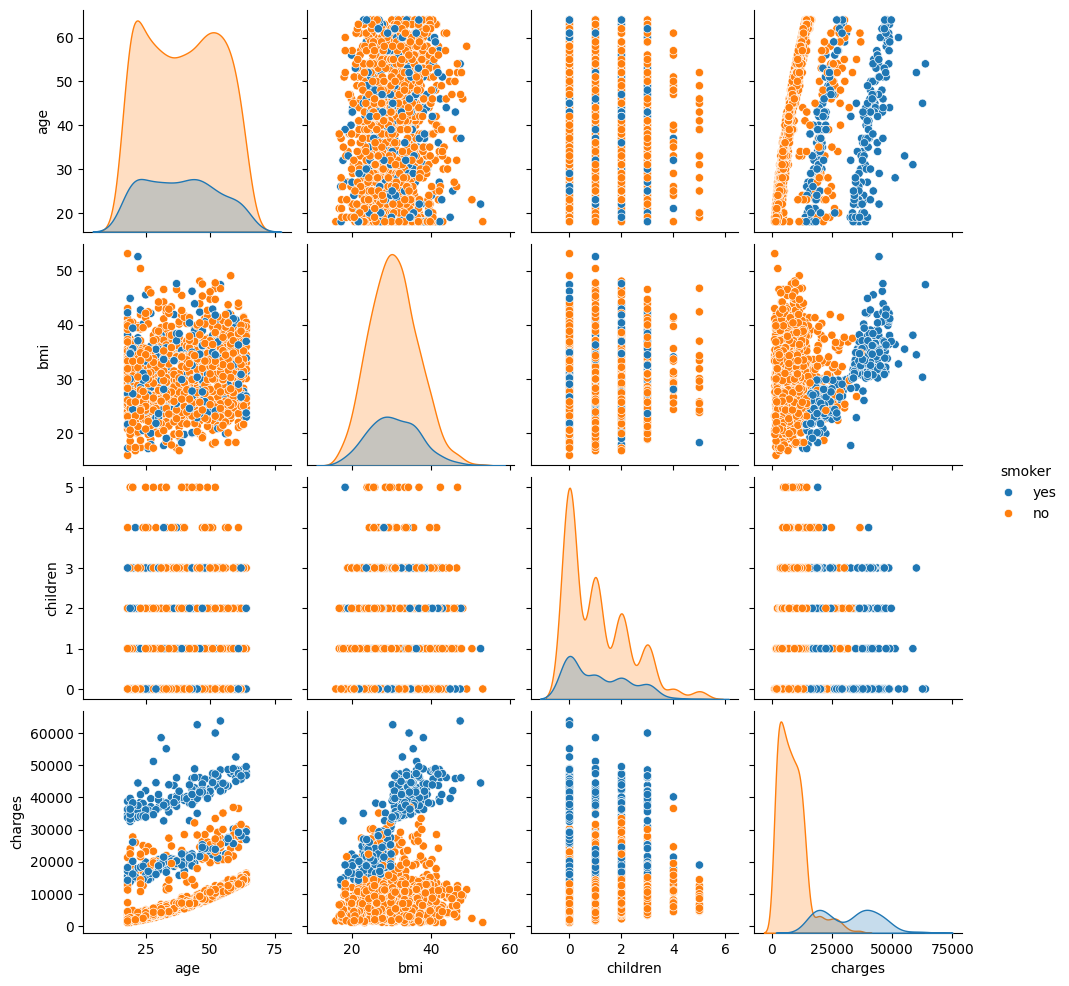

In [14]:
# Pairplot of numerical variables colored by "smoker" status
plt.figure(figsize=(10, 8))
sns.pairplot(my_data, hue='smoker', height=2.5)
plt.show()

In [15]:
# **Insurance Charges**: The target variable we are trying to predict. It is a continuous variable representing the medical costs incurred by the policyholder.

# Insurance charges prediction using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
# Data preparation
X = my_data.drop('charges', axis=1)
Y = my_data['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = ['age', 'bmi', 'children']
numeric_features_transformer = StandardScaler()
categorical_features = ['sex', 'smoker', 'region']
categorical_features_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_features_transformer, numeric_features),
        ('cat', categorical_features_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, Y_train)

# Make predictions
Y_pred = pipeline.predict(X_test)
# Evaluate the model    
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 33596915.851361476
R^2 Score: 0.7835929767120722


Text(0.5, 1.0, 'Actual vs Predicted Charges')

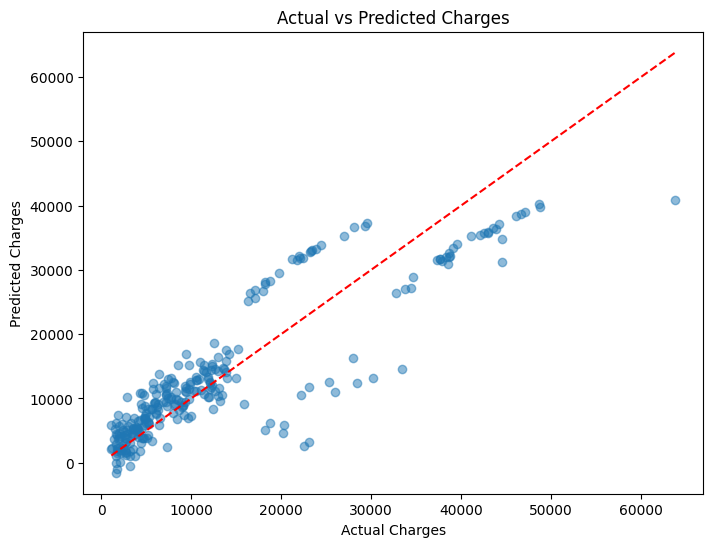

In [ ]:
# Plotting the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

# This model does predictions following the trend but wide dispersion especially for high values of charges (>30k), and sysmetic underestimation of very high loads (>50k).
# This indicates that the model is not very accurate for high charges, which could be due to the linear regression model's limitations in capturing complex relationships in the data.


In [19]:
import joblib
joblib.dump(pipeline, 'insurance_model_linear_regression.pkl')
# The model is saved as a pickle file for future use

['insurance_model_linear_regression.pkl']

Mean Squared Error: 20665899.11179323
R^2 Score: 0.866885230473601


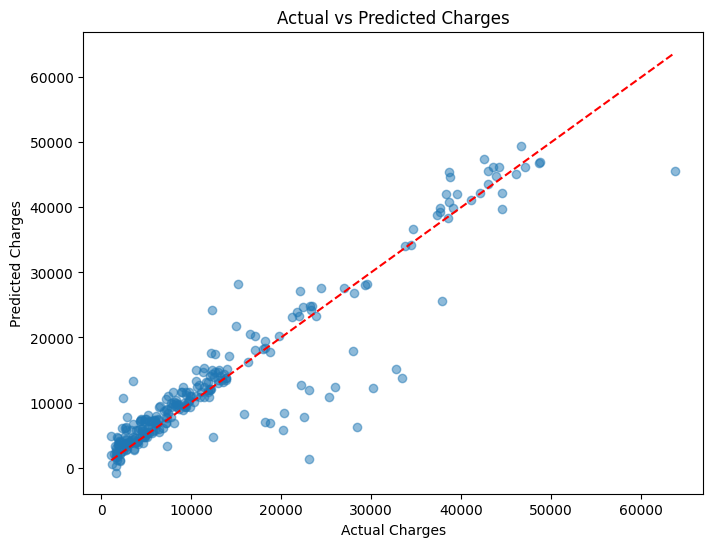

In [ ]:
# We can try other models to improve the performance.
# For example, we can use XGBRegressor as follows:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Define the models
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        objective='reg:squarederror'
    ))
])

# Fit the model
model.fit(X_train, Y_train)
# Make predictions
Y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# Plotting the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

# We do have a better model with XGBoost with R² score of 0.87.

In [21]:
# Save the model
joblib.dump(model, 'insurance_model_xgboost.pkl')

['insurance_model_xgboost.pkl']